### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [51]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Import the necessary packages - 2.5 marks

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [169]:
df_data = pd.read_csv("data.csv")
df_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [170]:
df_item = pd.read_csv("item.csv")
df_item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [171]:
df_user = pd.read_csv("user.csv")
df_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [54]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


(100000, 4)

In [138]:
df_data.shape

(100000, 4)

In [55]:
df_data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [56]:
df_data.isnull().sum().sum()

0

#### 4. Find the number of movies per genre using the item data - 5 marks

In [97]:
# use sum on the default axis
df_genre = df_item.iloc[:,3:22]         
df_genre.sum(axis=0)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [166]:
#hint: use sum on the axis = 1
df_genre['movie title'] = df_item['movie title']
df_genre_movies = df_genre[df_genre.sum(axis=1) > 1]
df_genre_movies['movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [167]:
df_item_dropped = df_item[df_item.unknown != 1]
df_item_dropped.shape

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [96]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


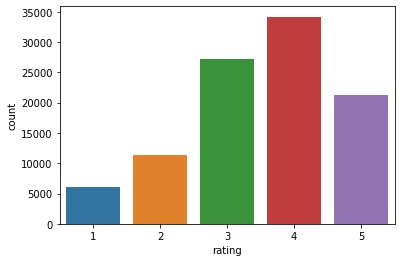

In [80]:
#your answers here
sns.countplot(x="rating", data=df_data)

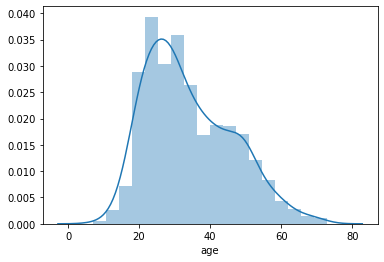

In [85]:
age = df_user['age']
sns.distplot(age)

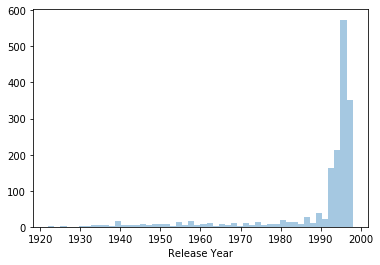

In [173]:
release_date = df_item['release date']
release_year = release_date.apply(lambda x:x[-4:])
chart = sns.distplot(release_year, kde=False)
plt.xlabel("Release Year")
plt.show(chart)

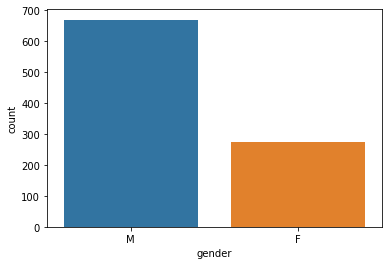

In [81]:
sns.countplot(x="gender", data=df_user)

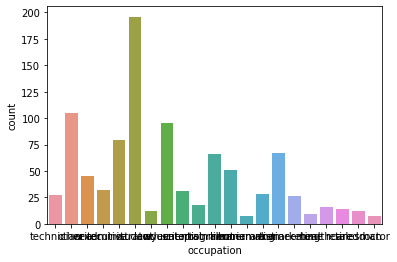

In [82]:
sns.countplot(x="occupation", data=df_user)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

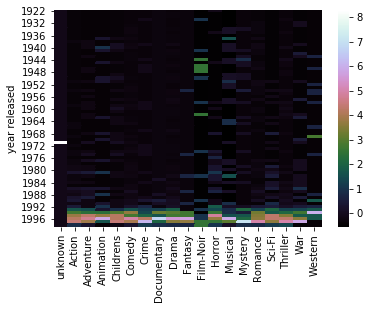

In [190]:
#Your answer here
df_item['year released'] = df_item['release date'].apply(lambda x:x[-4:])
genres_by_year = df_item.groupby(['year released']).sum()
df1 = genres_by_year.drop(['movie id'], axis=1)

#Normalize for better color spectrum
df2 =(df1-df1.mean())/df1.std()
sns.heatmap(df2, cmap="cubehelix")

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [233]:
#your answer here
df_ratings = df_data.groupby(['movie id'], as_index=False)['rating'].count()
df1 = df_ratings[df_ratings.rating > 100]
df_avg_rating = df_data.groupby(['movie id'], as_index=False)['rating'].mean()
df2 = pd.merge(df1, df_avg_rating, on='movie id', how='left')
df3 = pd.merge(df2, df_item, on='movie id', how='left')
df3.sort_values(by=['rating_y'], inplace=True, ascending=False)
df3.head(25)

,movie id,rating_x,rating_y,movie title,release date,unknown,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year released
231,408,112,4.491071,"Close Shave, A",28-Apr-1996,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1996
202,318,298,4.466443,Schindler's List,01-Jan-1993,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1993
91,169,118,4.466102,"Wrong Trousers, The",01-Jan-1993,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1993
261,483,243,4.456790,Casablanca,01-Jan-1942,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1942
29,64,283,4.445230,"Shawshank Redemption, The",01-Jan-1994,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994
292,603,209,4.387560,Rear Window,01-Jan-1954,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1954
7,12,267,4.385768,"Usual Suspects, The",14-Aug-1995,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
22,50,583,4.358491,Star Wars,01-Jan-1977,0,1,1,0,0,...,0,0,0,0,1,1,0,1,0,1977
99,178,125,4.344000,12 Angry Men,01-Jan-1957,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1957
72,134,198,4.292929,Citizen Kane,01-Jan-1941,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1941


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [235]:
df1 = pd.merge(df_data, df_item, on='movie id', how='left')
df2 = pd.merge(df1, df_user, on='user id', how='left')
df2.groupby(['gender'])['Drama'].sum()
#TRUE, Men watch more drama than women

gender
F    11008.0
M    28887.0
Name: Drama, dtype: float64

In [236]:
df2.groupby(['gender'])['Sci-Fi'].sum()
#FALSE, Women watch more Sci-Fi than men

gender
F     2629.0
M    10101.0
Name: Sci-Fi, dtype: float64

In [237]:
df2.groupby(['gender'])['Romance'].sum()
#TRUE Men watch more romance than men

gender
F     5858.0
M    13603.0
Name: Romance, dtype: float64